# Procesos aleatorios y Monte Carlo | Kevin Cabreja 10146048
# Pontificia Universidad Católica Madre y Maestra

**Asignatura:** Procesos Estocásticos  
**Tema:** Probabilidad de colisión en el acceso aleatorio LTE/5G  
**Fecha:** 22/9/2025

---

## Introducción
En las redes celulares LTE y 5G, cuando varios equipos de usuario (UE, *User Equipment*) desean conectarse de forma simultánea, utilizan el **Random Access Channel (RACH)** para enviar un preámbulo de solicitud de conexión.  
El estándar define un conjunto de **preámbulos ortogonales** (en este caso \(P = 64\)) para evitar interferencias.  
Sin embargo, si **dos o más UEs** eligen el mismo preámbulo en el mismo instante de acceso, ocurre una **colisión de acceso**, lo que retrasa la conexión y degrada el desempeño de la red.

Este problema es similar al **“problema del cumpleaños”**, donde se desea conocer la probabilidad de que al menos dos personas cumplan años el mismo día.  
Aquí, en lugar de días, tenemos **64 preámbulos** y, en vez de personas, **N UEs**.

---

## Objetivos
¿Cuál es la probabilidad de que al menos dos UEs escojan el mismo preámbulo, provocando una colisión de acceso?

Indique también el valor aproximado de N necesario para que esa probabilidad alcance el 50 %

Explique el comportamiento de la probabilidad cuando aumenta el número de UEs. ¿Qué patrón observa?

Si tenemos un numero de UEs determinando como se comporta la probabilidad si modificamos la cantidad de preámbulos ortogonales posibles. ¿Qué patrón observa?

---

## Cálculo exacto de la probabilidad
La probabilidad de **no colisión** es la probabilidad de que cada UE elija un preámbulo diferente.  
Si hay \(P\) preámbulos y \(N\) UEs, se calcula como:

$$
P_{\text{sin colisión}} = \frac{P \cdot (P-1) \cdot (P-2) \cdots (P-N+1)}{P^N}
$$

Por lo tanto, la probabilidad de **al menos una colisión** es:

$$
P_{\text{colisión}} = 1 - P_{\text{sin colisión}}
$$

## Resultados

El resultado del código Python nos muestra que:

- **Probabilidad de colisión (exacta) con N=30:** 99.97195515307864 %
- **Probabilidad de colisión (Monte Carlo) con N=30:** 99.984 %

- **N aproximado para 50 % de probabilidad:** 10 

Con **30 UEs**, la probabilidad de colisión es prácticamente del **100%**, mientras que con **10 UEs** la probabilidad es cercana al **50%**.

---

## Análisis del patrón cuando varía N
- A medida que **aumenta N**, la probabilidad de colisión crece **rápidamente**.  
- El crecimiento no es lineal: al principio sube despacio, pero una vez que N es un porcentaje moderado de P, la probabilidad sube casi exponencialmente hasta acercarse a 1.

---

## Efecto de variar el número de preámbulos (P)
Si se incrementa la cantidad de preámbulos:
- Para el mismo N, la probabilidad de colisión **disminuye**, ya que hay más opciones disponibles.  
- El patrón sigue siendo similar: a medida que N se acerca a P, la probabilidad vuelve a crecer con rapidez.

Si se reduce P:
- Con pocos preámbulos, la probabilidad de colisión se dispara incluso para valores pequeños de N.


Otro codigo de ejemplo muestra que:

- **Probabilidad de colisión (Monte Carlo) con 42 UEs (N) y 150 preámbulos (P)** 99.837 %   

- **Probabilidad de colisión (Monte Carlo) con 42 UEs (N) y y 1800 preámbulos (P)** 38.259 % 

---

## Conclusiones
- El acceso aleatorio en LTE/5G sufre de colisiones cuando muchos UEs intentan acceder al mismo tiempo.  
- Con P=64, **basta con 10 UEs** para tener una probabilidad de colisión de alrededor del **50%**, y con 30 UEs la colisión es casi **segura**.
- **Monte Carlo** confirma el cálculo exacto, mostrando diferencias mínimas (del orden de 0.01%).  
- Aumentar el número de preámbulos disponibles es una forma de reducir la probabilidad de colisión, pero si el número de UEs crece demasiado, la colisión vuelve a ser muy probable.

A continuación podemos observar, el codigo completo utilizado para obtener los resultados antes vistos y sus gráficas.
---







Probabilidad de colisión (exacta) con N=30: 99.97195515307864 %

Probabilidad de colisión (Monte Carlo) con N=30: 99.976 %

N aproximado para 50% de probabilidad: N= 10


Prueba con preámbulos distintos con 40 UEs
Probabilidad de colisión (Monte Carlo) con 40 UEs (N) y 150 preámbulos (P): 99.66000000000001 %
Probabilidad de colisión (Monte Carlo) con 40 UEs (N) y y 1800 preámbulos (P): 35.327999999999996 %
Probabilidad de colisión (Monte Carlo) con 40 UEs (N) y y 200,000 preámbulos (P): 0.38999999999999996 %



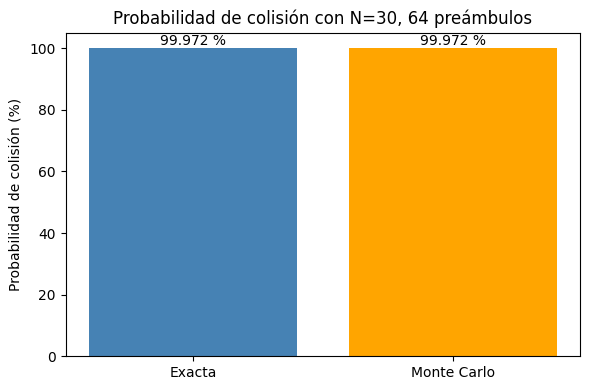

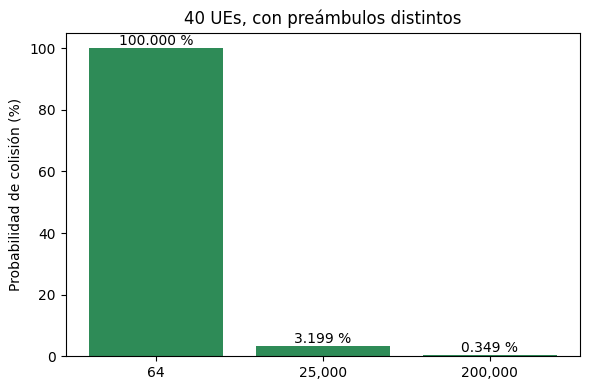

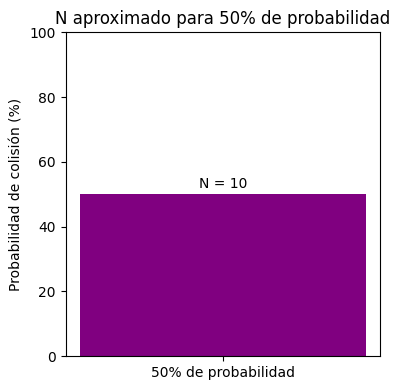

In [6]:
import random
import math
import matplotlib.pyplot as plt

# En una celda LTE / 5G, los equipos de usuario (UE) 
# emplean el Random Access Channel (RACH) para solicitar 
# conexión.


# Parámetros del problema
P = 64       # cantidad de preámbulos octogonales posibles
N = 30       # cantidad de UEs o dispositivos

# 1- Probabilidad exacta (Calculo Matemático)

print()
def prob_colision_exacta(P, N):
    if N > P:
        return 1.0  # si hay más UEs que preámbulos, la colisión es segura
    prob_sin_colision = 1.0
    for k in range(N):
        prob_sin_colision *= (P - k) / P
    return 1 - prob_sin_colision


print("Probabilidad de colisión (exacta) con N=30:", prob_colision_exacta(P, N)*100, "%")
print()



# 2️- Estimación por simulación Monte Carlo (Simulación)

def prob_colision_montecarlo(P, N, iteraciones=100000):
    colisiones = 0
    for _ in range(iteraciones):
        # cada UE elige un preámbulo aleatorio entre 0 y P-1
        elecciones = [random.randint(0, P-1) for _ in range(N)]
        # si el número de elementos únicos es menor que N, hubo colisión
        if len(set(elecciones)) < N:
            colisiones += 1
    return colisiones / iteraciones

print("Probabilidad de colisión (Monte Carlo) con N=30:",
      prob_colision_montecarlo(P, N)*100, "%")

# 3️- Calcular el N para el que la probabilidad ≈ 50 %

def encontrar_N_50(P):
    n = 1
    while True:
        if prob_colision_exacta(P, n) >= 0.5:
            return n
        n += 1

print()
print("N aproximado para 50% de probabilidad: N=", encontrar_N_50(P))
print()
print()



# Prueba con preámbulos distintos con 40 UEs
print("Prueba con preámbulos distintos con 40 UEs")
N2 = 40
P2 = 150    

N3 = 40
P3 = 1800

N4 = 40
P4 = 200000


def prob_colision_montecarlo2(P2, N2, iteraciones2=100000):
    colisiones2 = 0
    for _ in range(iteraciones2):
        # cada UE elige un preámbulo aleatorio entre 0 y P-1
        elecciones2 = [random.randint(0, P2-1) for _ in range(N2)]
        # si el número de elementos únicos es menor que N, hubo colisión
        if len(set(elecciones2)) < N2:
            colisiones2 += 1
    return colisiones2 / iteraciones2
print("Probabilidad de colisión (Monte Carlo) con 40 UEs (N) y 150 preámbulos (P):",
      prob_colision_montecarlo2(P2, N2)*100, "%")


def prob_colision_montecarlo3(P3, N3, iteraciones3=100000):
    colisiones3 = 0
    for _ in range(iteraciones3):
        # cada UE elige un preámbulo aleatorio entre 0 y P-1
        elecciones3 = [random.randint(0, P3-1) for _ in range(N3)]
        # si el número de elementos únicos es menor que N, hubo colisión
        if len(set(elecciones3)) < N3:
            colisiones3 += 1
    return colisiones3 / iteraciones3
print("Probabilidad de colisión (Monte Carlo) con 40 UEs (N) y y 1800 preámbulos (P):",
      prob_colision_montecarlo3(P3, N3)*100, "%")


def prob_colision_montecarlo4(P4, N4, iteraciones4=100000):
    colisiones4 = 0
    for _ in range(iteraciones4):
        # cada UE elige un preámbulo aleatorio entre 0 y P-1
        elecciones4 = [random.randint(0, P4-1) for _ in range(N4)]
        # si el número de elementos únicos es menor que N, hubo colisión
        if len(set(elecciones4)) < N4:
            colisiones4 += 1
    return colisiones4 / iteraciones4
print("Probabilidad de colisión (Monte Carlo) con 40 UEs (N) y y 200,000 preámbulos (P):",
      prob_colision_montecarlo4(P4, N4)*100, "%")
print()



prob_colision_N30_exacta = 99.97195515307864
prob_colision_N30_monte   = 99.97200000000001
N_50pct = 10
prob_50pct = 50

preámbulos = ['64', '25,000', '200,000']
prob_preambulos = [100.0, 3.199, 0.349]

# -----------------------------
# 1 Gráfica: Exacta vs Monte Carlo para N=30
# -----------------------------
plt.figure(figsize=(6,4))
plt.bar(['Exacta', 'Monte Carlo'],
        [prob_colision_N30_exacta, prob_colision_N30_monte],
        color=['steelblue','orange'])
plt.ylabel('Probabilidad de colisión (%)')
plt.title('Probabilidad de colisión con N=30, 64 preámbulos')
plt.ylim(0,105)
plt.text(0, prob_colision_N30_exacta+1, f'{prob_colision_N30_exacta:.3f} %', ha='center')
plt.text(1, prob_colision_N30_monte+1, f'{prob_colision_N30_monte:.3f} %', ha='center')
plt.tight_layout()
plt.show()

# -----------------------------
# 2️- Gráfica: Preambulos distintos con 40 UEs
# -----------------------------
plt.figure(figsize=(6,4))
plt.bar(preámbulos, prob_preambulos, color='seagreen')
plt.ylabel('Probabilidad de colisión (%)')
plt.title('40 UEs, con preámbulos distintos')
plt.ylim(0,105)
for i, val in enumerate(prob_preambulos):
    plt.text(i, val+1, f'{val:.3f} %', ha='center')
plt.tight_layout()
plt.show()

# -----------------------------
# 3 Gráfica: UEs necesarios para un 50% de prob
# -----------------------------


plt.figure(figsize=(4,4))
plt.bar(['50% de probabilidad'], [prob_50pct], color='purple')
plt.ylabel('Probabilidad de colisión (%)')
plt.title('N aproximado para 50% de probabilidad')
plt.ylim(0, 100)
plt.text(0, prob_50pct + 2, f'N = {N_50pct}', ha='center')
plt.tight_layout()
plt.show()
